# Introduction

Based on a dataset consisting of Percentage of Body Fat and other 14 physical measurements of 252 men, we aim at showing some statistical characteristics of data and variables in use of, and further analyzing the relationships and proposing a linear model between Percentage of Body Fat (Dependent variable) and other given variables (Independent variables).

An analysis of the Body Fat reveals a linear relationship between body fat and weight, abdomen.


# Background

The body fat percentage (BFP) of a human or other living being is the total mass of fat divided by total body mass, times 100; body fat includes essential body fat and storage body fat. Essential body fat is necessary to maintain life and reproductive functions. [1]

In recent years, the estimation of body fat percentage is popular to be used to evaluated the health condition of people. Since it is the only body measurement which directly calculates a person's relative body composition without regard to height or weight. 
Below is a graph from the National Health and Nutrition Examination Survey in the United States charts the average body fat percentages of Americans from samples from 1999–2004: [2]
<img src="picture.gif",width=600,height=600>

# Description

The dataset consists of 17 variables with a sample space of 252 men. The 17 variables are INDO (index), Percentage of body fat (%), Body density from underwater weighing (gm/cm^3), Age (year), Weight (lbs), Height (inches), Adioposity (bmi) and ten Body Circumferences (Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist, all in units of cm). Percentage of body fat is given from Siri's (1956) equation:
Percentage of Body Fat = 495/Density – 450


# Quick Look at Row Data

We typically first take a look at row data, using summary to see a basic overview of data for each variable with the first variable (INDO) excluded.

In [104]:
summary(data)

    BODYFAT         DENSITY           AGE            WEIGHT     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:13.10   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.97   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     HEIGHT        ADIPOSITY          NECK           CHEST       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    ABDOMEN            HIP            THIGH            KNEE      
 Min.   : 69.40  

We can surprisingly see strange patterns for some variable. 
For BODYFAT variable, the minimum number is 0.00, which comes from the 182nd row.

In [101]:
which(data$BODYFAT==0)

[1] 182

In [102]:
data[182,]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


It is because, by Siri's equation, given a body density of 1.1089, the percentage body fat is negative (-3.61) which is treated as 0 in the dataset.We further detect that the minimums of Percentage, Weight, Chest Cir., Abdomen Cir. Hip Cir. Thigh Cir. and the Maximum of Density all come from the 182nd observation;
We further check the maximum record in BODYFAT, which is from the 216th observation.


In [103]:
data[216,]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In addition, the Maximums of Weight, Neck Cir., Chest Cir., Abdomen Cir., Hip Cir., Thigh Cir., Knee Cir., Biceps Cir., Wrist Cir. are all from the same observation, which is the 39th. We now set it aside for further study.


# Data Cleaning

We first fit a full linear model with the 182nd observation excluded.

From the Residuals vs Fitted plot, we can say residuals approximately equally spread around a horizontal line without distinct patterns, there is no significant non-linear relationships.
From Q-Q plot, residuals are normally distributed.
From Scale-Location plot, residuals are spread equally along the ranges of predictors. This shows that the assumption of equal variance is satisfied.
From Residuals vs Leverage plot, some points are far beyond the Cook’s distance lines. The plot identified the influential observation as #42, and #86, #39 may also have high leverage. So, we further look at a plot of Cook’s distance.


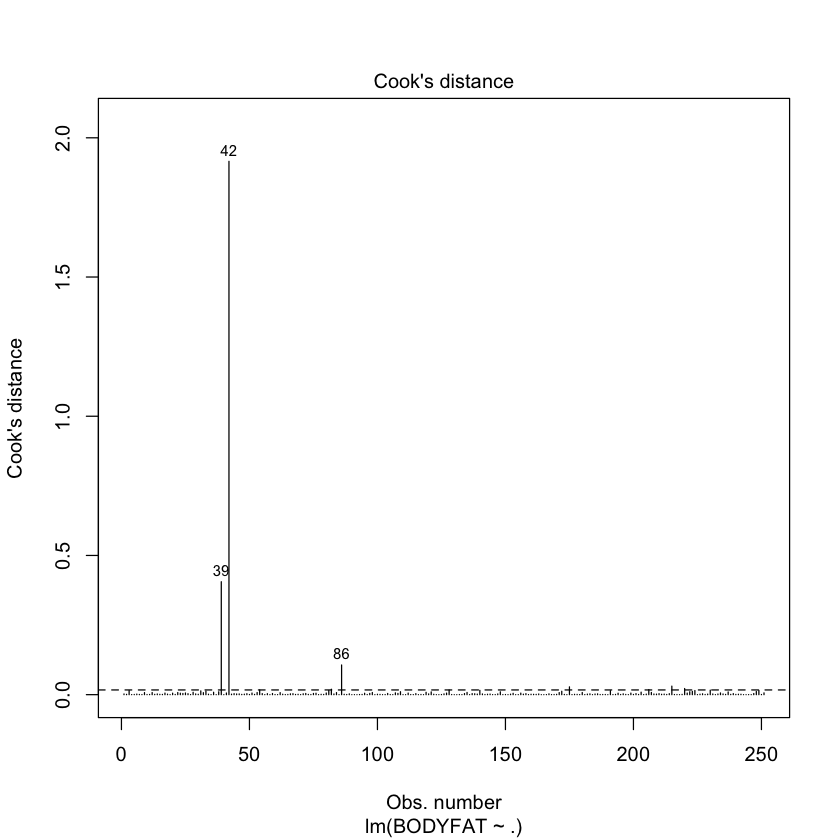

In [122]:
model.r = lm(BODYFAT~., data[-182,-2])
plot(model.r, which = 4)
abline(h = 4/(nrow(data)-ncol(data)), lty = 2) 

We now examine these abnormal points.

In [109]:
data[c(39, 42, 86),]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,1.0386,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2


No.39 has the largest weight but normal weight(363.15 lb and 72.25 inches). No.42 has extremely small height with normal weight. No.86 seems to be normal.
For the 42nd observation, the height is of 29.5 inches, it is impossible. We directly remove this point. However, even the 39thobservations have some abnormal patterns, we cannot conclude it as outliers for sure yet.

Therefore, we look at the Siri formula and draw a graph between body fat and 1/density. (insert plot)

We find three abnormal points: 48, 76, 96, which are not at the regression line.

We first check the 48th and compare it with the 24th observation, we find that all of his measurements are quite similar to the 24th except for body fat, it is impossible for the 48th to have so small body fat, we choose to re-impute its body fat via its density by the Siri formula. It is replaced from the original 6.4 to 14.1.

Then we look at the 76th point. As showed above, we compare it with the 24th observation, the measurement of YEAR NECK CHEST ABDOMEN HIP for 76 are larger than 24, it is impossible for him to have a smaller body fat. So keep it!

Finally, we examine the 96th point. By calculating the body fat via its density, we get a theoretical value as 0.368, it is too small so we conclude its density is 
mis-recorded provided that the other measurements are quite normal. Just ignore the density

Besides, we investigate the difference between the theoretical values of BMI with variable ADIPOSITY. Intuitively, these two kind values should be similar. However, we still get three abnormal points: 42, 163, 221. We examine #163 and #163 individually.

Compare 19 with 163: They have basically the same HEIGHT and WEIGHT, CHEST 19 >> 163, ABDOMEN 19 < 163, BICEPS 19 >> 163 ---> indicates that 19 is in a better shape than 163, HOWEVER, the BODYFAT of 163 is SMALLER than 19, it makes no sense! (Unless the 163 guy is skinny without a good shape)
We conclude that there is something wrong with the HEIGHT or WEIGHT for 163.

Compare 220 with 221: WEIGHT 221 < 220, HEIGHT 221 > 220, BODYFAT 221 < 220 WRIST 221 > 220 ANKLE 221 > 220 >> The 220 guy has less fat & larger bone, so he should look thinner than 221. HOWEVER, most measurement of 221 guy is larger than 220, makes no sense. We conclude that there is something wrong with the HEIGHT or WEIGHT for 221.

So far, we finish the data cleaning work. Through the analysis above, we decide to exclude the 182nd, 42nd, 163th, 221st observations, and modify body fat value for the 48th observation.


# Model

First fit the full model with cleaned data and draw the diagnostic plot:

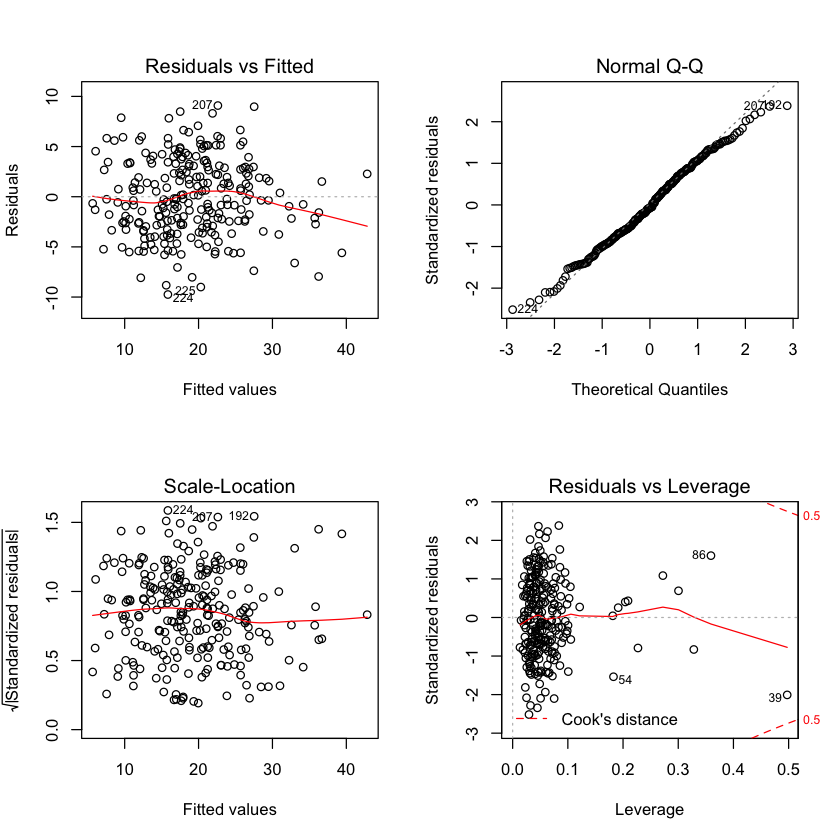

In [111]:
rm(list = ls())
library(MASS)
library(car)
data<- read.csv("BodyFat.csv", header = TRUE) 
data<- data[ ,-1]
data$BODYFAT[48] = 14.1
cData = data[c(-182,-42,-163,-221),]
acData = cData[,-2]

model = lm(BODYFAT~., acData)
#summary(model)

par(mfrow = c(2,2))
plot(model)

The residual plot shows that the linearity is not very good while the normality is valid. Then try to do the variable selection by using BIC stepwise procedure.

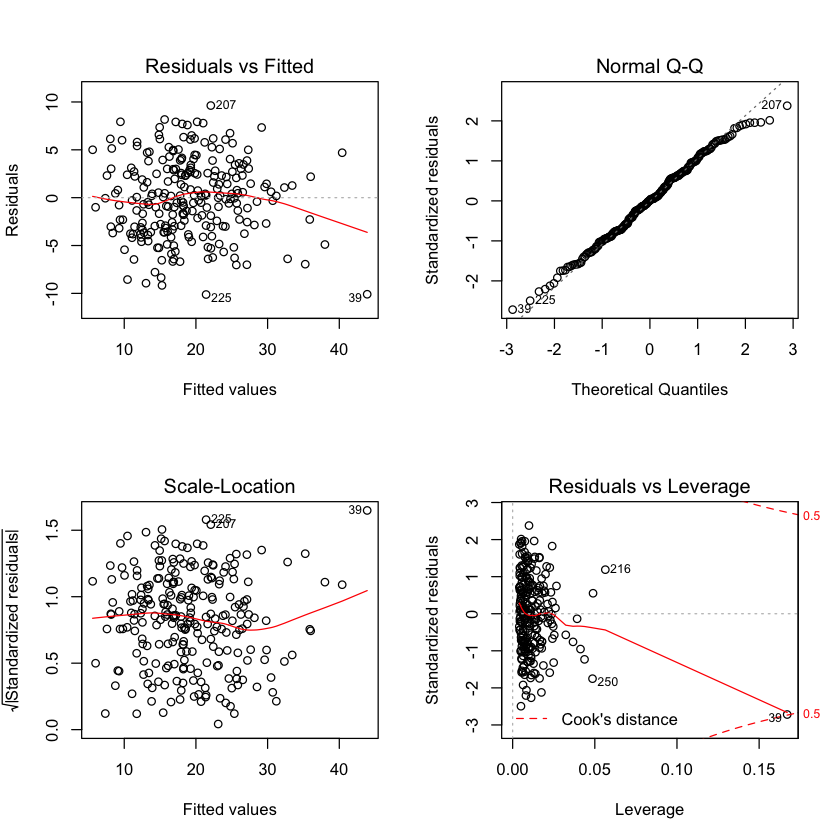

In [114]:
m_null <- lm(BODYFAT ~ 1, data = acData)
m_BIC_both <- step(m_null, direction="both",
                   scope=list(lower=~1,upper= model), k=log(nrow(acData)-1), trace = F)
par(mfrow = c(2,2))
plot(m_BIC_both)

From the diagonistic plot, we try to improve the linearity. First we see the partial residual plot:

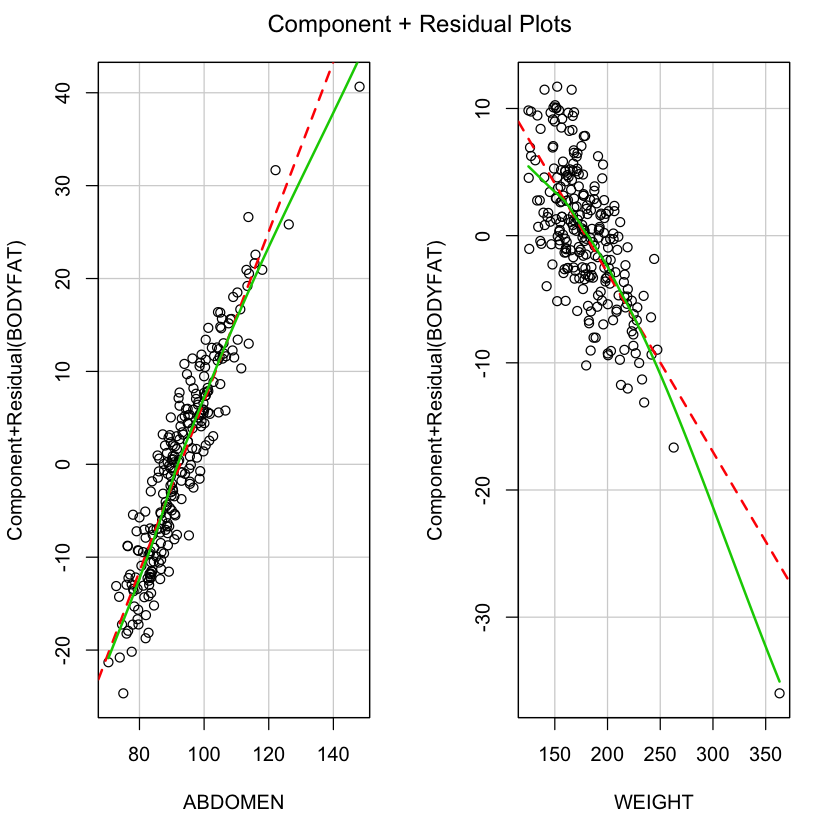

In [116]:
crPlots(m_BIC_both)

The partial residual plot indicates that weight need some transformation to achieve better lionearity. Then use BOX-COX transformation:

[1] -0.6414641


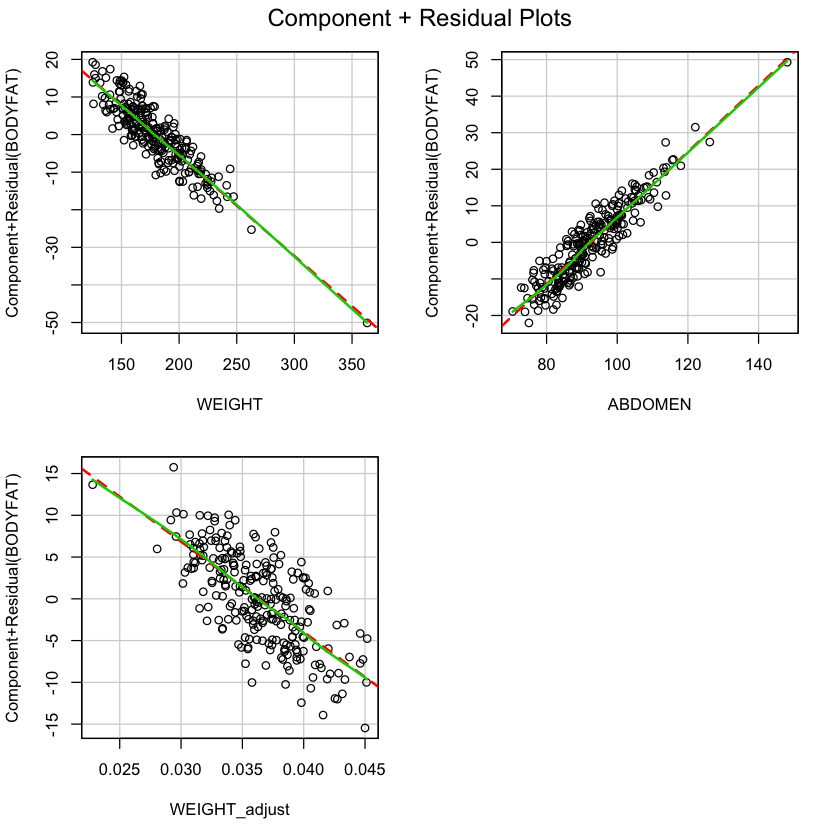

In [119]:
bc = boxcox(WEIGHT~1, data = acData, lambda = seq(-6, 6, length = 10000), plotit = F)
trans <- bc$x[which.max(bc$y)]
WEIGHT_adjust = acData$WEIGHT^trans
model.adjust = lm(BODYFAT ~ WEIGHT + ABDOMEN + WEIGHT_adjust, acData)
crPlots(model.adjust)

The partial residual plot looks good and further check the diagonistic plot:

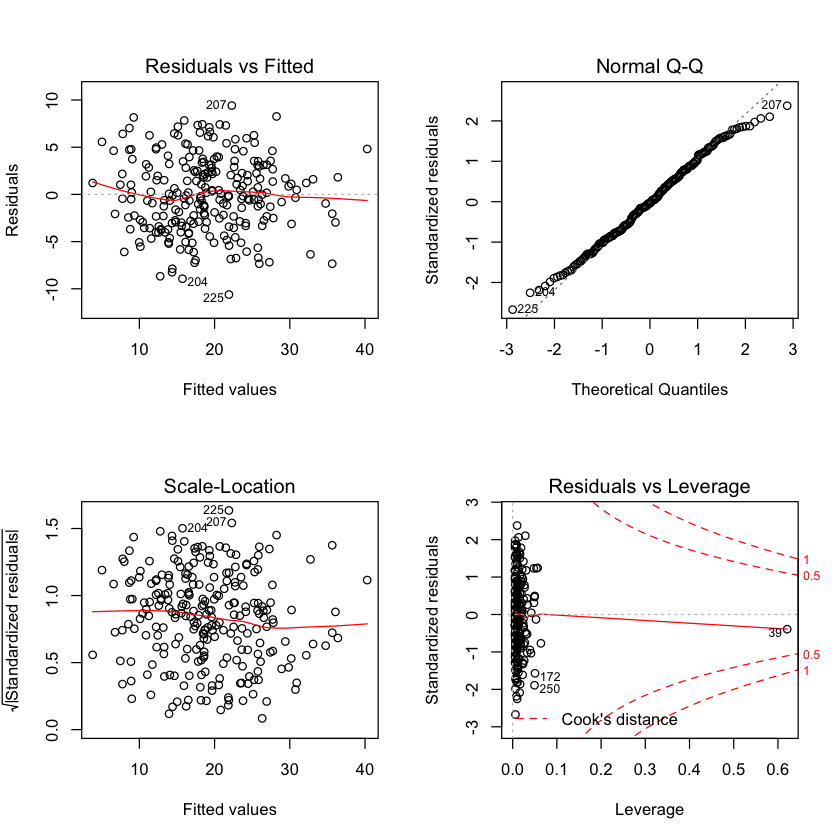

In [120]:
par(mfrow = c(2,2))
plot(model.adjust)

The plots show the model is valid.
Our Proposed Model to predict body fat %:
##### (Body Fat %)=22.18 +0.9054Abdomen-0.267Weight-1084Weight^0.64

##### Possible rule of thumb: "divide your Weight by 7 and add your Abdomen minus 40"

# Strengths and Weaknesses

The model is a reasonable model between body fat % and abdomen, weight. 

Moreover, the model has the following strengths and advantages:
1. Linearity: seems reasonable (both based on diagnostic residual plot and original scatterplot)
2. Explanatory variables: reasonable since it's easy to think one’s body fat with his weight and abdomen. Because intuitively, if a man has a big abdomen, he tends to be fatter. Meanwhile, if his weight is heavier given other body measurements fixed, he is likely to be more muscled, since fat has less density.
3. Constant effects: reasonable because it is not affected by age or non-body factors.
4. Normally distributed errors: seems reasonable from the Q-Q plot diagnostic.
5. Constant variance: seems reasonable.

Overall, our model provides a relatively simple way of predict the body fat % purely based on weight and abdomen. 

Last but not least, there still exists some potential weaknesses or questions.
1. Should there be non-linear relationships? We only fit linear models and the true relations could be more complicated.
2. How to solve the multicollinearity between circumferences and other variables?
3. Could the conclusion also be used for women? The data was only collected for men, and therefore the model is only suitable for men. Does there exist a general formula for both men and women?

# Reference

[1] Body fat percentage, Wikipedia, https://en.wikipedia.org/wiki/Body_fat_percentage

[2] QuickStats: Mean Percentage Body Fat, by Age Group and Sex --- National Health and Nutrition Examination Survey, United States, 1999--2004